In [215]:
import numpy as np
import pandas as pd

import warnings 
warnings.filterwarnings('ignore')

store = pd.read_csv("store.csv")
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

## Pre-processing the datasets

In [147]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [216]:
# Convert float to integer
store.CompetitionDistance = store.CompetitionDistance.astype("Int64")
store.CompetitionOpenSinceMonth = store.CompetitionOpenSinceMonth.astype("Int64")
store.CompetitionOpenSinceYear = store.CompetitionOpenSinceYear.astype("Int64")
store.Promo2SinceWeek = store.Promo2SinceWeek.astype("Int64")
store.Promo2SinceYear = store.Promo2SinceYear.astype("Int64")

# Determine how many null values are in each column
print(store.isna().sum())
print("How many stores do not participate in Promo2:", (store["Promo2"] == 0).sum())

# Remove null values by replacing with the mean of that column
store.CompetitionDistance = store["CompetitionDistance"].fillna(store["CompetitionDistance"].mode()[0])

store.CompetitionOpenSinceMonth = store["CompetitionOpenSinceMonth"].fillna(store["CompetitionOpenSinceMonth"].mode()[0])
store.CompetitionOpenSinceYear = store["CompetitionOpenSinceYear"].fillna(store["CompetitionOpenSinceYear"].mode()[0])

# Transform CompetitonOpenSinceYear and CompetitionOpenSinceMonth into a singular date
store["CompetitionOpenSince"] = store[["CompetitionOpenSinceMonth","CompetitionOpenSinceYear"]].apply(lambda x: "-".join(x.values.astype(str)), axis = "columns")
store["CompetitionOpenSince"] = pd.to_datetime(store["CompetitionOpenSince"]).dt.to_period("M")


Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64
How many stores do not participate in Promo2: 544


In [149]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [217]:
# Convert float to integer
train.Store = train.Store.astype("Int64")
train.DayOfWeek = train.DayOfWeek.astype("Int64")
train.Sales = train.Sales.astype("Int64")
train.Customers = train.Customers.astype("Int64")
train.Open = train.Open.astype("Int64")
train.Promo = train.Promo.astype("Int64")
train.SchoolHoliday = train.SchoolHoliday.astype("Int64")

# Convert Date to a datetime type
train["Date"] = pd.to_datetime(train["Date"])

# Check for null values
print(train.isna().sum())

# Clean issue with unique values in StateHoliday column
print(train["StateHoliday"].unique())
train["StateHoliday"] = train["StateHoliday"].replace(0, "0")


Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64
['0' 'a' 'b' 'c' 0]


In [201]:
test.info()
print(test["StateHoliday"].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Store          41088 non-null  Int64         
 1   DayOfWeek      41088 non-null  Int64         
 2   Date           41088 non-null  datetime64[ns]
 3   Sales          0 non-null      Int64         
 4   Customers      0 non-null      Int64         
 5   Open           41077 non-null  Int64         
 6   Promo          41088 non-null  Int64         
 7   StateHoliday   41088 non-null  object        
 8   SchoolHoliday  41088 non-null  Int64         
dtypes: Int64(7), datetime64[ns](1), object(1)
memory usage: 3.1+ MB
['0' 'a']


In [218]:
# Convert float to integer
test.Store = test.Store.astype("Int64")
test.DayOfWeek = test.DayOfWeek.astype("Int64")
test.Sales = test.Sales.astype("Int64")
test.Customers = test.Customers.astype("Int64")
test.Open = test.Open.astype("Int64")
test.Promo = test.Promo.astype("Int64")
test.SchoolHoliday = test.SchoolHoliday.astype("Int64")

# Convert Date to a datetime type
test["Date"] = pd.to_datetime(test["Date"])

# Check for null values
print(train.isna().sum())

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64


## Exploratory Data Analysis (EDA)

<AxesSubplot:title={'center':'Customer Relative to Promo'}, xlabel='Promo', ylabel='Customers'>

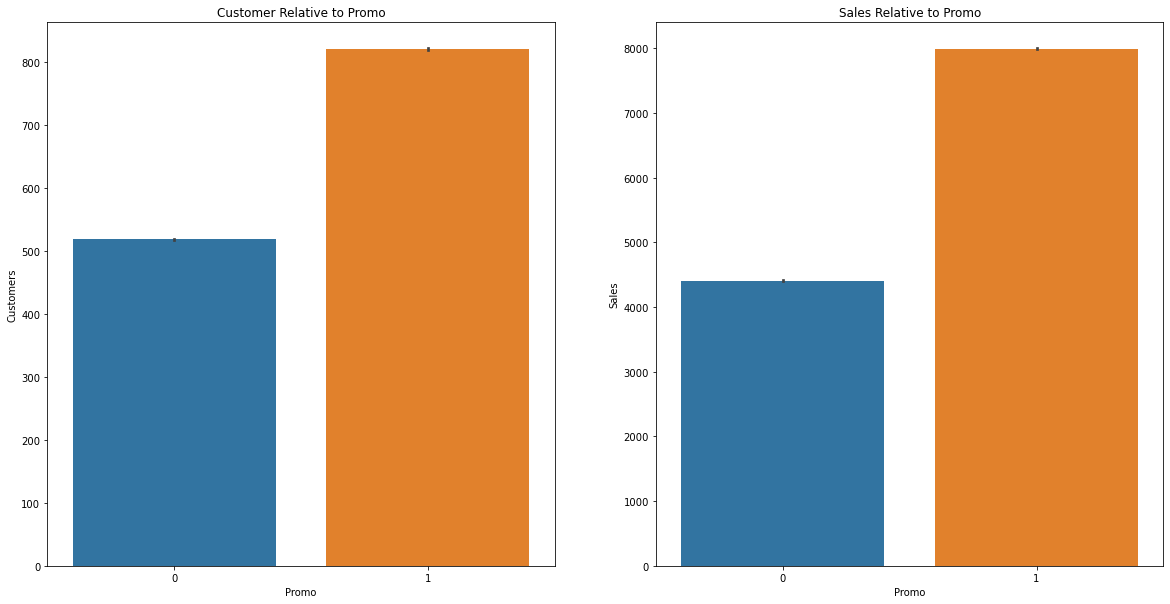

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (axis1, axis2) = plt.subplots(1, 2, figsize = (20, 10))

axis1.title.set_text("Sales Relative to Promo")
axis2.title.set_text("Customers Relative to Promo")
sns.barplot(x = "Promo", y = "Sales", data = train, ax = axis1)
sns.barplot(x = "Promo", y = "Customers", data = train, ax = axis2)

<AxesSubplot:title={'center':'Customers Relative To The Day Of The Week'}, xlabel='DayOfWeek', ylabel='Customers'>

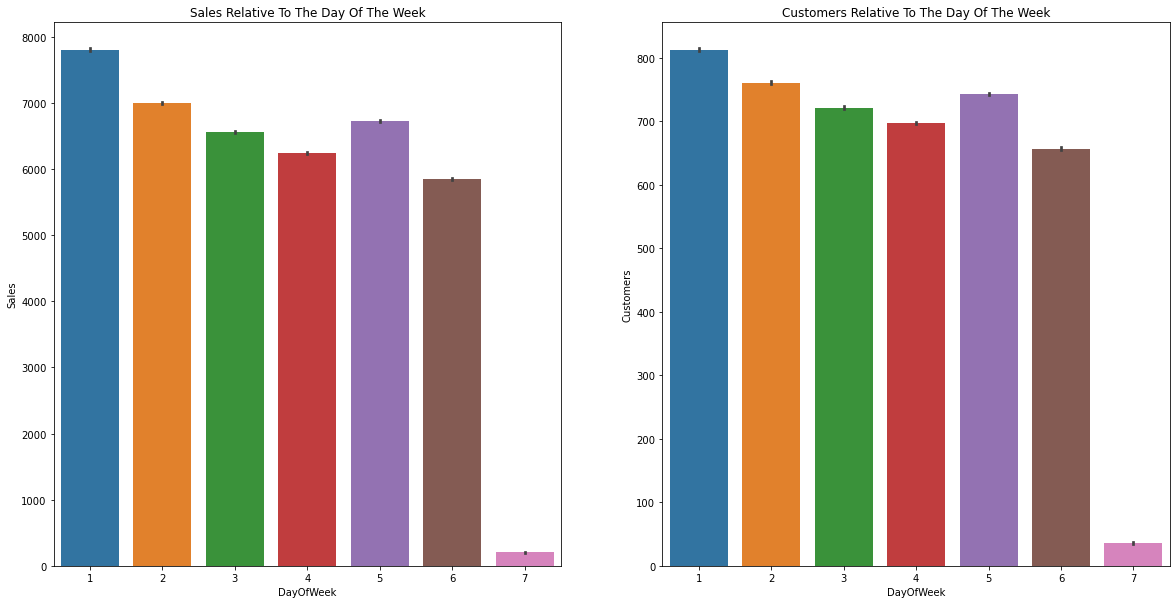

In [158]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize = (20, 10))

axis1.title.set_text("Sales Relative To The Day Of The Week")
axis2.title.set_text("Customers Relative To The Day Of The Week")
axis1.set(xlabel = "Day Of The Week")
axis2.set(xlabel = "Day Of The Week")
sns.barplot(x = "DayOfWeek", y = "Sales", data = train, order = [1, 2, 3, 4, 5, 6, 7], ax = axis1)
sns.barplot(x = "DayOfWeek", y = "Customers", data = train, order = [1, 2, 3, 4, 5, 6, 7], ax = axis2)

<AxesSubplot:title={'center':'Customers Relative To The Day Of The Week When Store Are Open'}, xlabel='DayOfWeek', ylabel='Customers'>

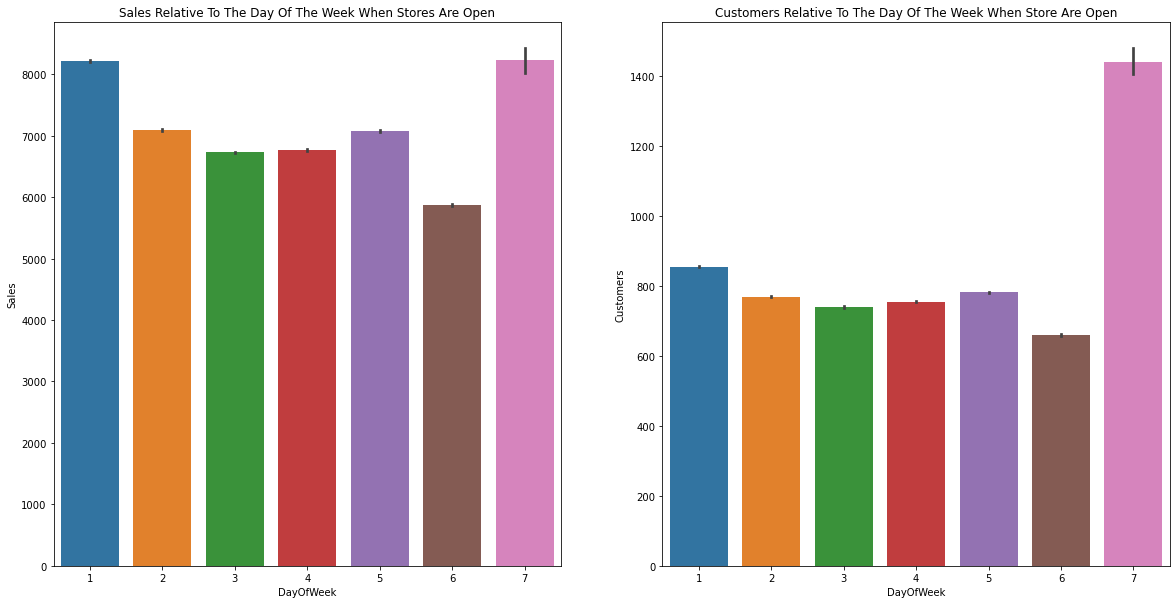

In [159]:
store_open = train.loc[train["Open"] == 1]

fig, (axis1, axis2) = plt.subplots(1, 2, figsize = (20, 10))

axis1.title.set_text("Sales Relative To The Day Of The Week When Stores Are Open")
axis2.title.set_text("Customers Relative To The Day Of The Week When Store Are Open")
axis1.set(xlabel = "Day Of The Week")
axis2.set(xlabel = "Day Of The Week")
sns.barplot(x = "DayOfWeek", y = "Sales", data = store_open, order = [1, 2, 3, 4, 5, 6, 7], ax = axis1)
sns.barplot(x = "DayOfWeek", y = "Customers", data = store_open, order = [1, 2, 3, 4, 5, 6, 7], ax = axis2)

In [219]:
# Merging the datasets for further analysis
trainmerged = pd.merge(train, store, on = "Store")
testmerged = pd.merge(test, store, on = "Store")

<AxesSubplot:title={'center':'Customers Relative To The Day Of The Week'}, xlabel='StoreType', ylabel='Customers'>

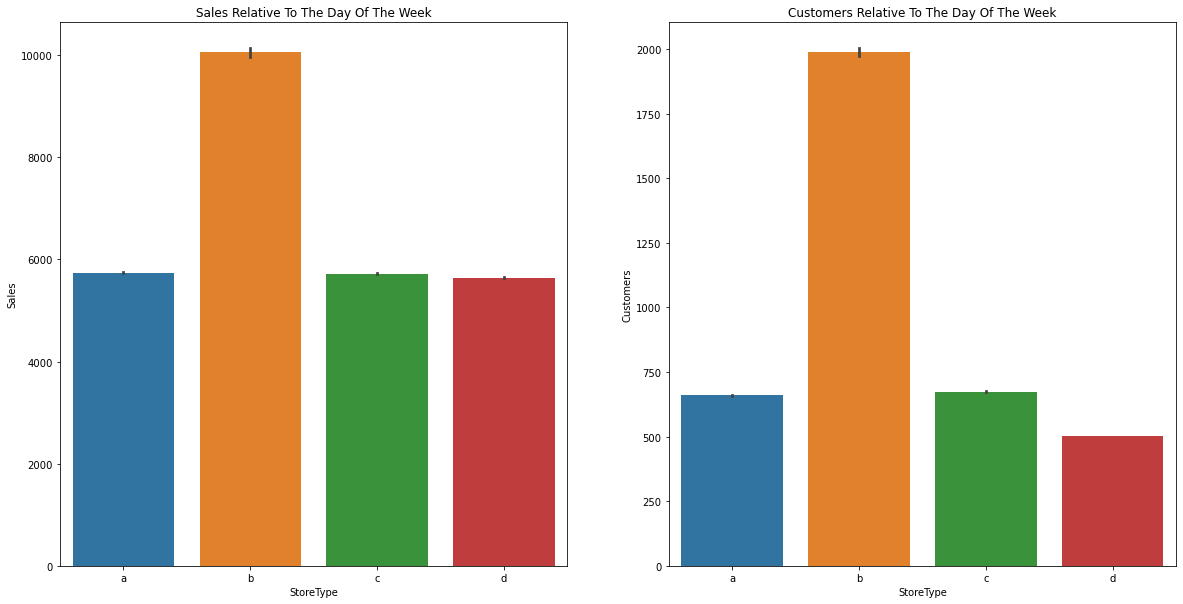

In [161]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize = (20, 10))

axis1.title.set_text("Sales Relative To The Store Type")
axis2.title.set_text("Customers Relative To The Store Type")
sns.barplot(x = "StoreType", y = "Sales", data = trainmerged, order = ["a", "b", "c", "d"], ax = axis1)
sns.barplot(x = "StoreType", y = "Customers", data = trainmerged, order = ["a", "b", "c", "d"], ax = axis2)

<AxesSubplot:title={'center':'Customers Relative To The Day Of The Week'}, xlabel='Assortment', ylabel='Customers'>

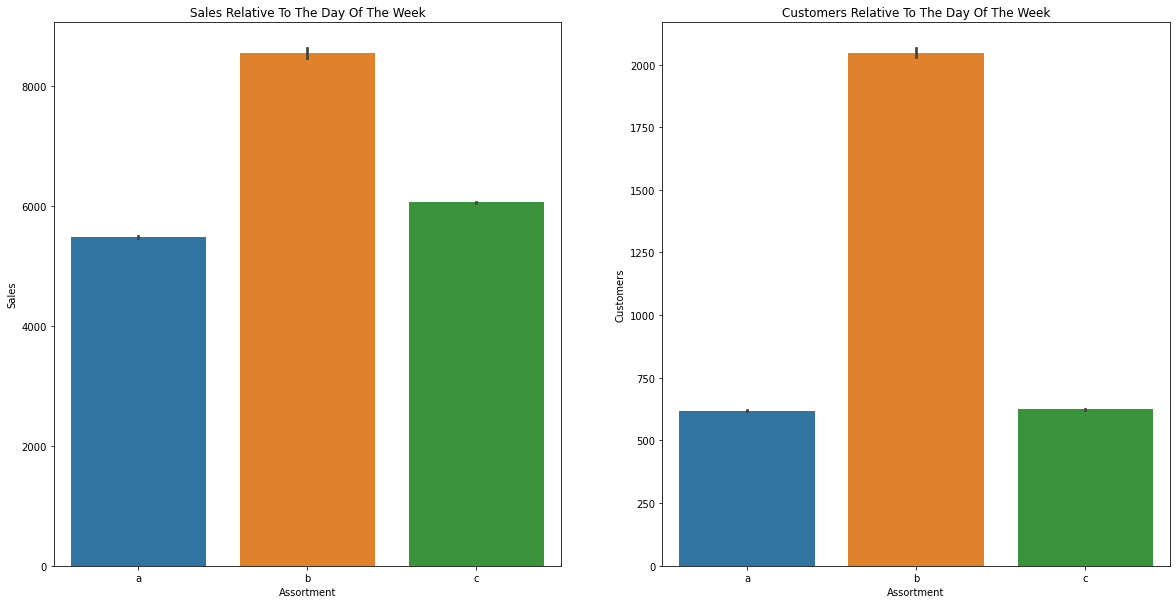

In [162]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize = (20, 10))

axis1.title.set_text("Sales Relative To The Day Of The Week")
axis2.title.set_text("Customers Relative To The Day Of The Week")
sns.barplot(x = "Assortment", y = "Sales", data = trainmerged, order = ["a", "b", "c"], ax = axis1)
sns.barplot(x = "Assortment", y = "Customers", data = trainmerged, order = ["a", "b", "c"], ax = axis2)

<AxesSubplot:title={'center':'Customers Relative To Whether Promo2 is in Operation'}, xlabel='Promo2', ylabel='Customers'>

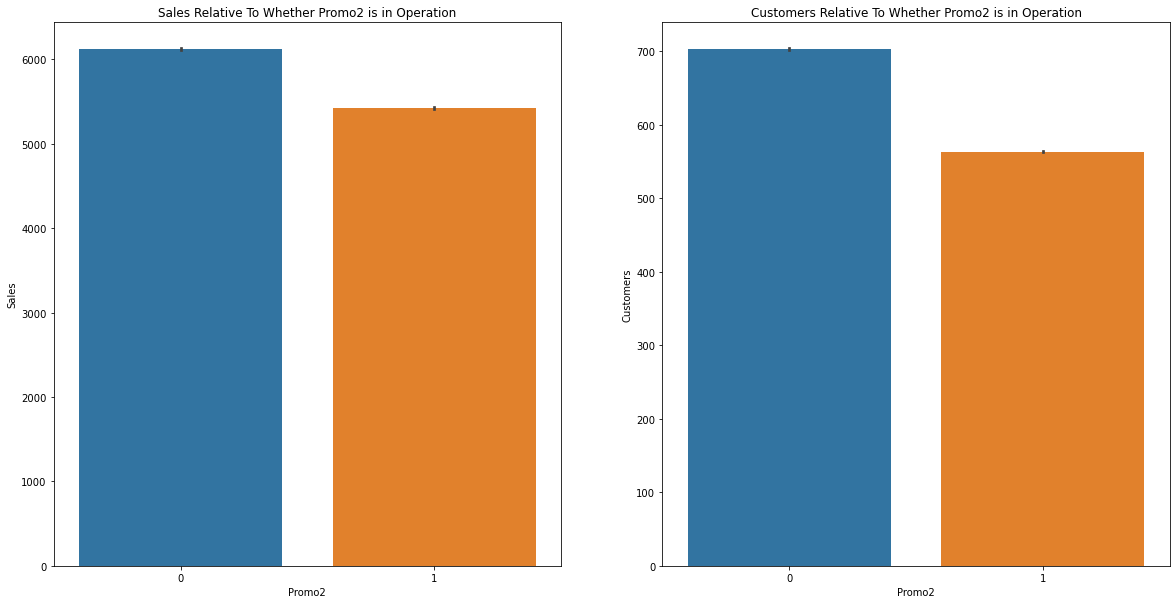

In [163]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize = (20, 10))

axis1.title.set_text("Sales Relative To Whether Promo2 is in Operation")
axis2.title.set_text("Customers Relative To Whether Promo2 is in Operation")
sns.barplot(x = "Promo2", y = "Sales", data = trainmerged, ax = axis1)
sns.barplot(x = "Promo2", y = "Customers", data = trainmerged, ax = axis2)

## Machine Learning
### Application of Ridge, Lasso and Random Forest Regression
### Performing Cross-validation on the best performing model

In [221]:
# Confirm that the datasets have a matching format
training = trainmerged.drop(["CompetitionOpenSinceMonth", "CompetitionOpenSinceYear", "Promo2SinceWeek", "Promo2SinceYear", "PromoInterval"], axis = 1)
training = pd.get_dummies(training, columns = ["DayOfWeek", "StateHoliday", "StoreType", "Assortment"])
print(training.info())

testing = testmerged.drop(["CompetitionOpenSinceMonth", "CompetitionOpenSinceYear", "Promo2SinceWeek", "Promo2SinceYear", "PromoInterval"], axis = 1)
testing = pd.get_dummies(testing, columns = ["DayOfWeek", "StateHoliday"])
testing["StateHoliday_b"] = 0
testing["StateHoliday_c"] = 0
testing.StateHoliday_b = testing.StateHoliday_b.astype("uint8")
testing.StateHoliday_c = testing.StateHoliday_c.astype("uint8")
testing = pd.get_dummies(testing, columns = ["StoreType", "Assortment"])
print(testing.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Store                 41088 non-null  Int64         
 1   Date                  41088 non-null  datetime64[ns]
 2   Sales                 0 non-null      Int64         
 3   Customers             0 non-null      Int64         
 4   Open                  41077 non-null  Int64         
 5   Promo                 41088 non-null  Int64         
 6   SchoolHoliday         41088 non-null  Int64         
 7   CompetitionDistance   41088 non-null  Int64         
 8   Promo2                41088 non-null  int64         
 9   CompetitionOpenSince  41088 non-null  period[M]     
 10  DayOfWeek_1           41088 non-null  uint8         
 11  DayOfWeek_2           41088 non-null  uint8         
 12  DayOfWeek_3           41088 non-null  uint8         
 13  DayOfWeek_4     

In [222]:
# Log of sales
training['Sales'] = training['Sales'].apply(lambda x: max(x, 1))
training["Sales_Log"] = np.log(training["Sales"])

In [ ]:
# Checking for multicollinearity within the data
fig, ax = plt.subplots(figsize=(20,20))
sns.set()
sns.color_palette('rocket_r', as_cmap = True)
sns.heatmap(training.corr())
plt.xticks(rotation=90)
plt.show()

In [224]:
from sklearn.model_selection import train_test_split

X = training.drop(["Sales", "Sales_Log", "Customers", "Date", "CompetitionOpenSince"], axis = 1)
y = training["Sales_Log"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [225]:
# Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

ridge_reg = Ridge(alpha = 1.0)
ridge_reg.fit(X_train, y_train)
ridge_prediction = ridge_reg.predict(X_val)
ridge_rmse = np.sqrt(mean_squared_error(y_val, ridge_prediction))
print("The performance of the model on the validation data:", ridge_reg.score(X_val, y_val))
print("The RMSE of the model on the validation data:", ridge_rmse)

The performance of the model on the validation data: 0.9890398244333294
The RMSE of the model on the validation data: 0.3473320462834762


In [226]:
# Lasso Regression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

lasso_reg = Lasso(alpha = 1.0)
lasso_reg.fit(X_train, y_train)
lasso_prediction = lasso_reg.predict(X_val)
lasso_rmse = np.sqrt(mean_squared_error(y_val, lasso_prediction))
print("The performance of the model on the validation data:", lasso_reg.score(X_val, y_val))
print("The RMSE of the model on the validation data:", lasso_rmse)

The performance of the model on the validation data: 0.3383691122300765
The RMSE of the model on the validation data: 2.698633985155954


In [227]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

rfr_reg = RandomForestRegressor(n_estimators = 100, random_state = 42)
rfr_reg.fit(X_train, y_train)
rfr_prediction = rfr_reg.predict(X_val)
rfr_rmse = np.sqrt(mean_squared_error(y_val, rfr_prediction))
print("The performance of the model on the validation data:", rfr_reg.score(X_val, y_val))
print("The RMSE of the model on the validation data:", rfr_rmse)

The performance of the model on the validation data: 0.9975679406549132
The RMSE of the model on the validation data: 0.16361502515966053


In [257]:
# Cross validation of Random Forest Regression 
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rfr_reg, X , y , cv=7)
print(cv_scores)

[0.98971606 0.98603015 0.98699692 0.98324782 0.98408568 0.98553262
 0.9857012 ]


# Final predictions on the test data

In [265]:
X_test = testing.drop(["Sales", "Customers", "Date", "CompetitionOpenSince"], axis = 1)

# CLean X_test dataset
print(X_test.loc[X_test["Open"].isnull()].head())
store622 = X_test.loc[X_test["Store"] == 622]
X_test.Open = X_test["Open"].fillna(value = 1)
print(X_test.isna().sum())

       Store  Open  Promo  SchoolHoliday  CompetitionDistance  Promo2  \
22992    622  <NA>      1              0                  250       0   
22993    622  <NA>      1              0                  250       0   
22994    622  <NA>      1              0                  250       0   
22995    622  <NA>      1              0                  250       0   
22997    622  <NA>      0              0                  250       0   

       DayOfWeek_1  DayOfWeek_2  DayOfWeek_3  DayOfWeek_4  ...  \
22992            0            0            0            1  ...   
22993            0            0            1            0  ...   
22994            0            1            0            0  ...   
22995            1            0            0            0  ...   
22997            0            0            0            0  ...   

       StateHoliday_a  StateHoliday_b  StateHoliday_c  StoreType_a  \
22992               0               0               0            1   
22993               0   

In [267]:
# Predict results using random forest regression
results = rfr_reg.predict(X_test)

# Input results into the testing dataset
testing["Sales"] = np.exp(results)

In [268]:
testing.head()

,Store,Date,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,Promo2,CompetitionOpenSince,...,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,1,2015-09-17,4931.033517,<NA>,1,1,0,1270,0,2008-09,...,0,0,0,0,0,1,0,1,0,0
1,1,2015-09-16,5025.146176,<NA>,1,1,0,1270,0,2008-09,...,0,0,0,0,0,1,0,1,0,0
2,1,2015-09-15,5302.725513,<NA>,1,1,0,1270,0,2008-09,...,0,0,0,0,0,1,0,1,0,0
3,1,2015-09-14,5795.535405,<NA>,1,1,0,1270,0,2008-09,...,0,0,0,0,0,1,0,1,0,0
4,1,2015-09-13,1.000000,<NA>,0,0,0,1270,0,2008-09,...,0,0,0,0,0,1,0,1,0,0
